# Predicting Bankruptcy in Poland

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import gzip

## Prepare Data

### Open


In [18]:
# Open compressed file, load into dictionary
with gzip.open("data/poland-bankruptcy-data-2009.json.gz", "r") as f:
    poland_data = json.load(f)
    
print(type(poland_data))

<class 'dict'>


### Explore

In [19]:
# get keys of JSON file
poland_data.keys()

dict_keys(['schema', 'data', 'metadata'])

In [20]:
# fet information about the data
poland_data['metadata']

{'title': 'Ensemble Boosted Trees with Synthetic Features Generation in Application to Bankruptcy Prediction',
 'authors': 'Zieba, M., Tomczak, S. K., & Tomczak, J. M.',
 'journal': 'Expert Systems with Applications',
 'publicationYear': 2016,
 'dataYear': 2009,
 'articleLink': 'doi:10.1016/j.eswa.2016.04.001',
 'datasetLink': 'https://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data'}

In [21]:
# print schema 
poland_data['schema']

{'fields': [{'name': 'company_id', 'type': 'integer'},
  {'name': 'feat_1', 'type': 'number'},
  {'name': 'feat_2', 'type': 'number'},
  {'name': 'feat_3', 'type': 'number'},
  {'name': 'feat_4', 'type': 'number'},
  {'name': 'feat_5', 'type': 'number'},
  {'name': 'feat_6', 'type': 'number'},
  {'name': 'feat_7', 'type': 'number'},
  {'name': 'feat_8', 'type': 'number'},
  {'name': 'feat_9', 'type': 'number'},
  {'name': 'feat_10', 'type': 'number'},
  {'name': 'feat_11', 'type': 'number'},
  {'name': 'feat_12', 'type': 'number'},
  {'name': 'feat_13', 'type': 'number'},
  {'name': 'feat_14', 'type': 'number'},
  {'name': 'feat_15', 'type': 'number'},
  {'name': 'feat_16', 'type': 'number'},
  {'name': 'feat_17', 'type': 'number'},
  {'name': 'feat_18', 'type': 'number'},
  {'name': 'feat_19', 'type': 'number'},
  {'name': 'feat_20', 'type': 'number'},
  {'name': 'feat_21', 'type': 'number'},
  {'name': 'feat_22', 'type': 'number'},
  {'name': 'feat_23', 'type': 'number'},
  {'name': 

In [22]:
# get financial data of the first company
poland_data['data'][0]

{'company_id': 1,
 'feat_1': 0.17419,
 'feat_2': 0.41299,
 'feat_3': 0.14371,
 'feat_4': 1.348,
 'feat_5': -28.982,
 'feat_6': 0.60383,
 'feat_7': 0.21946,
 'feat_8': 1.1225,
 'feat_9': 1.1961,
 'feat_10': 0.46359,
 'feat_11': 0.21946,
 'feat_12': 0.53139,
 'feat_13': 0.14233,
 'feat_14': 0.21946,
 'feat_15': 592.24,
 'feat_16': 0.6163,
 'feat_17': 2.4213,
 'feat_18': 0.21946,
 'feat_19': 0.12272,
 'feat_20': 37.573,
 'feat_21': 0.9969,
 'feat_22': 0.2951,
 'feat_23': 0.097402,
 'feat_24': 0.75641,
 'feat_25': 0.46359,
 'feat_26': 0.50669,
 'feat_27': 1.9737,
 'feat_28': 0.32417,
 'feat_29': 5.9473,
 'feat_30': 0.22493,
 'feat_31': 0.12272,
 'feat_32': 100.82,
 'feat_33': 3.6203,
 'feat_34': 0.71453,
 'feat_35': 0.2951,
 'feat_36': 1.8079,
 'feat_37': 123140.0,
 'feat_38': 0.46359,
 'feat_39': 0.16501,
 'feat_40': 0.21282,
 'feat_41': 0.041124,
 'feat_42': 0.16501,
 'feat_43': 95.682,
 'feat_44': 58.109,
 'feat_45': 0.94621,
 'feat_46': 0.90221,
 'feat_47': 44.941,
 'feat_48': 0.26003,

In [26]:
# calculate number of companies
print(f"There are {len(poland_data['data'])} companies in the dataset")

There are 9977 companies in the dataset


In [28]:
# calculate number of features
print(f"Each company has {len(poland_data['data'][0])} attributes")

Each company has 66 attributes


### Import

In [30]:
# define data wrangling function
def wrangle(filepath):
    
    # Open compressed file, load into dictionary
    with gzip.open(filepath, "r") as file:
        data = json.load(file)
        
    # Load dictionary into DataFrame, set index
    df = pd.DataFrame().from_dict(data['data']).set_index('company_id')

    return df

In [31]:
# print data
df = wrangle("data/poland-bankruptcy-data-2009.json.gz")
print(df.shape)
df.head()

(9977, 65)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,bankrupt
company_id,,,,,,,,,,,,,,,,,,,,,
1,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.12250,1.1961,0.46359,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,False
2,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.17210,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,False
3,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.98810,1.0077,0.67566,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,False
5,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.40940,1.3393,0.58496,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,False
6,0.182060,0.55615,0.32191,1.6045,16.3140,0.00000,0.182060,0.79808,1.8126,0.44385,...,0.555770,0.410190,0.46957,0.029421,8.4553,3.3488,107.240,3.4036,12.4540,False


### Explore More

In [32]:
# inspect dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 1 to 10503
Data columns (total 65 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feat_1    9977 non-null   float64
 1   feat_2    9977 non-null   float64
 2   feat_3    9977 non-null   float64
 3   feat_4    9960 non-null   float64
 4   feat_5    9952 non-null   float64
 5   feat_6    9977 non-null   float64
 6   feat_7    9977 non-null   float64
 7   feat_8    9964 non-null   float64
 8   feat_9    9974 non-null   float64
 9   feat_10   9977 non-null   float64
 10  feat_11   9977 non-null   float64
 11  feat_12   9960 non-null   float64
 12  feat_13   9935 non-null   float64
 13  feat_14   9977 non-null   float64
 14  feat_15   9970 non-null   float64
 15  feat_16   9964 non-null   float64
 16  feat_17   9964 non-null   float64
 17  feat_18   9977 non-null   float64
 18  feat_19   9935 non-null   float64
 19  feat_20   9935 non-null   float64
 20  feat_21   9205 non-null   flo

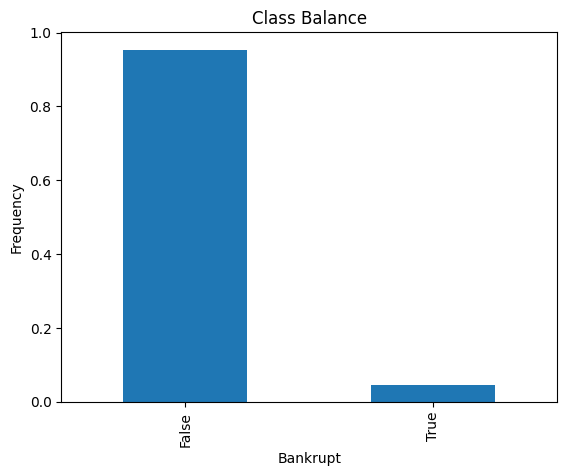

In [33]:
# plot class balance
df['bankrupt'].value_counts(normalize=True).plot(
    kind="bar",
    xlabel= "Bankrupt",
    ylabel="Frequency",
    title="Class Balance"
);

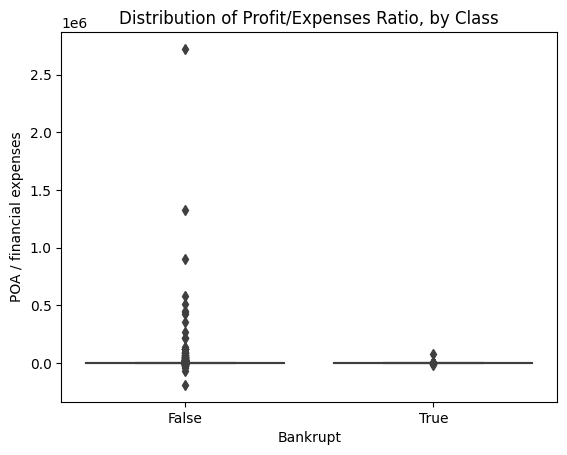

In [34]:
# Create boxplot for feat_27 (profit on operating activities / financial expenses)
sns.boxplot(x="bankrupt", y="feat_27", data=df)
plt.xlabel("Bankrupt")
plt.ylabel("POA / financial expenses")
plt.title("Distribution of Profit/Expenses Ratio, by Class");

#### Summary stats for feat_27

In [35]:
# Summary statistics for `feat_27`
df['feat_27'].describe().apply("{0:,.0f}".format)

count        9,312
mean         1,206
std         35,477
min       -190,130
25%              0
50%              1
75%              5
max      2,723,000
Name: feat_27, dtype: object